# pip install mpltools
# pip install matplotlib
# pip install numpy
# pip install folium
# pip install pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm
from scipy.interpolate import griddata  
import numpy.ma as ma
import folium
from folium.plugins import HeatMap
from mpltools import color

In [2]:
coordPrecipitacao = pd.read_csv("datasets\coordsPrecipitacaoFull.csv",";");  
#coordPrecipitacao['PRECIPITACAO'] = np.random.randint(100,900,coordPrecipitacao.shape[0])    
#coordPrecipitacao.to_csv("datasets\coordsPrecipitacaoFull.csv",sep=";")    
 

In [17]:
#https://vlsantos5938.medium.com/criando-mapas-meteorol%C3%B3gicos-interativos-usando-a-biblioteca-folium-5a95b4655924
#Criando um DataFrame, somando todos os valores de precipitação que possuam mesma latitude e longitude.
nd = pd.DataFrame(coordPrecipitacao, columns=['LONGITUDE', 'LATITUDE', 'PRECIPITACAO']).groupby(['LONGITUDE','LATITUDE'])['PRECIPITACAO'].sum().reset_index()
p = nd.loc[0:670]
nnd = pd.DataFrame(coordPrecipitacao,columns=['LONGITUDE', 'LATITUDE'])
nnw = nnd.loc[1:670].values.astype(float)

#Criando lista 
lat = p.LATITUDE.tolist()
lng = p.LONGITUDE.tolist()


#Criando o mapa 
m = folium.Map(
    location=[-30, -51],
    tiles='Stamen Terrain',
    zoom_start=5.49
)
#Inserindo os pontos dentro do mapa

HeatMap(list(zip(lat, lng))).add_to(m)

# Adicionando atributos ao seu mapa

folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('openstreetmap').add_to(m)
folium.map.LayerControl('bottomright', collapsed=False, autoZIndex=True).add_to(m)

# Criando legenda

#colormap = color.LinearColormap(colors=['lightblue','green','yellow','red'], index=None,vmin=0,vmax=900)
#colormap = color.LinearColormap('blue_clear_red', bcr_rgba,index=[0, 0.5, 0.5, 1],vmin=0,vmax=900)
#colormap = color.LinearColormap('white_red', [(1, 1, 1), (0.8, 0, 0)])

#colormap.caption= ('Acumulado de chuva (mm) maio/2020 - RS')
#colormap.add_to(m)

m

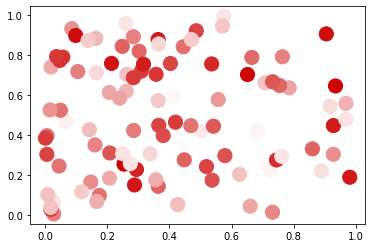

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from mpltools import color


x, y, z = np.random.uniform(size=(3, 100))

white_red = color.LinearColormap('white_red', [(1, 1, 1), (0.8, 0, 0)])
plt.scatter(x, y, c=z, cmap=white_red, s=200)

In [18]:
print(nd)

     LONGITUDE   LATITUDE  PRECIPITACAO
0   -79.494167 -84.000000           463
1   -72.786667  -8.950000           499
2   -72.747778  -8.267222           433
3   -72.681389  -7.610833           305
4   -71.617500  -4.530000           197
..         ...        ...           ...
608 -35.208056  -5.837222           109
609 -35.135278  -6.561944           386
610 -34.959167  -8.059167           786
611 -34.815556  -7.165278           477
612 -29.345904   0.916877           623

[613 rows x 3 columns]
